In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model


In [39]:
x_train = np.load('./data/x_train.npy')
x_test = np.load('./data/x_test.npy')
y_train = np.load('./data/y_train.npy')
y_test = np.load('./data/y_test.npy')

In [40]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, x_train.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [48]:
history=lstm.fit(x_train, y_train, epochs=25, batch_size=2, verbose=1, shuffle=False)

Epoch 1/25
945/945 [==============================] - 6s 7ms/step - loss: 0.2452
Epoch 2/25
945/945 [==============================] - 6s 7ms/step - loss: 0.0379
Epoch 3/25
945/945 [==============================] - 6s 7ms/step - loss: 0.0335
Epoch 4/25
945/945 [==============================] - 6s 7ms/step - loss: 0.4882
Epoch 5/25
945/945 [==============================] - 6s 7ms/step - loss: 0.0396
Epoch 6/25
945/945 [==============================] - 6s 7ms/step - loss: 0.0383
Epoch 7/25
945/945 [==============================] - 7s 7ms/step - loss: 0.3315
Epoch 8/25
945/945 [==============================] - 6s 7ms/step - loss: 0.0405
Epoch 9/25
945/945 [==============================] - 6s 7ms/step - loss: 0.0785
Epoch 10/25
945/945 [==============================] - 6s 7ms/step - loss: 0.0951
Epoch 11/25
945/945 [==============================] - 6s 7ms/step - loss: 0.0791
Epoch 12/25
945/945 [==============================] - 6s 7ms/step - loss: 0.3063
Epoch 13/25
945/945 [====

KeyboardInterrupt: 

In [42]:
predict_list = []
for i in range(300):
    predict_list += [[[400 + (10 * i)]]]
predict_list = np.array(predict_list)
print(predict_list)

[[[ 400]]

 [[ 410]]

 [[ 420]]

 [[ 430]]

 [[ 440]]

 [[ 450]]

 [[ 460]]

 [[ 470]]

 [[ 480]]

 [[ 490]]

 [[ 500]]

 [[ 510]]

 [[ 520]]

 [[ 530]]

 [[ 540]]

 [[ 550]]

 [[ 560]]

 [[ 570]]

 [[ 580]]

 [[ 590]]

 [[ 600]]

 [[ 610]]

 [[ 620]]

 [[ 630]]

 [[ 640]]

 [[ 650]]

 [[ 660]]

 [[ 670]]

 [[ 680]]

 [[ 690]]

 [[ 700]]

 [[ 710]]

 [[ 720]]

 [[ 730]]

 [[ 740]]

 [[ 750]]

 [[ 760]]

 [[ 770]]

 [[ 780]]

 [[ 790]]

 [[ 800]]

 [[ 810]]

 [[ 820]]

 [[ 830]]

 [[ 840]]

 [[ 850]]

 [[ 860]]

 [[ 870]]

 [[ 880]]

 [[ 890]]

 [[ 900]]

 [[ 910]]

 [[ 920]]

 [[ 930]]

 [[ 940]]

 [[ 950]]

 [[ 960]]

 [[ 970]]

 [[ 980]]

 [[ 990]]

 [[1000]]

 [[1010]]

 [[1020]]

 [[1030]]

 [[1040]]

 [[1050]]

 [[1060]]

 [[1070]]

 [[1080]]

 [[1090]]

 [[1100]]

 [[1110]]

 [[1120]]

 [[1130]]

 [[1140]]

 [[1150]]

 [[1160]]

 [[1170]]

 [[1180]]

 [[1190]]

 [[1200]]

 [[1210]]

 [[1220]]

 [[1230]]

 [[1240]]

 [[1250]]

 [[1260]]

 [[1270]]

 [[1280]]

 [[1290]]

 [[1300]]


In [45]:
y_pred = lstm.predict(x_test)


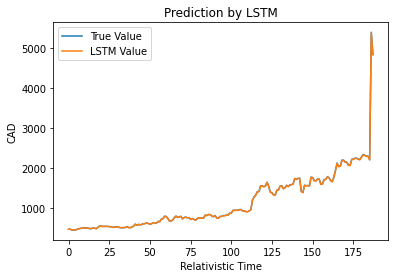

In [46]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Relativistic Time')
plt.ylabel('CAD')
plt.legend()
plt.show()

In [47]:
print(x_test)

[[[ 468.94]]

 [[ 471.  ]]

 [[ 454.21]]

 [[ 454.21]]

 [[ 455.1 ]]

 [[ 463.37]]

 [[ 479.61]]

 [[ 487.86]]

 [[ 493.44]]

 [[ 506.69]]

 [[ 501.85]]

 [[ 500.6 ]]

 [[ 501.1 ]]

 [[ 484.92]]

 [[ 488.13]]

 [[ 500.93]]

 [[ 497.94]]

 [[ 484.02]]

 [[ 515.41]]

 [[ 549.23]]

 [[ 549.23]]

 [[ 540.88]]

 [[ 540.88]]

 [[ 543.22]]

 [[ 543.22]]

 [[ 535.69]]

 [[ 535.69]]

 [[ 519.74]]

 [[ 519.74]]

 [[ 531.33]]

 [[ 529.97]]

 [[ 517.85]]

 [[ 509.59]]

 [[ 509.59]]

 [[ 513.24]]

 [[ 515.59]]

 [[ 530.86]]

 [[ 511.78]]

 [[ 509.08]]

 [[ 530.66]]

 [[ 546.67]]

 [[ 599.05]]

 [[ 569.85]]

 [[ 592.56]]

 [[ 580.5 ]]

 [[ 591.29]]

 [[ 608.52]]

 [[ 612.49]]

 [[ 630.  ]]

 [[ 615.04]]

 [[ 595.56]]

 [[ 609.07]]

 [[ 634.38]]

 [[ 631.18]]

 [[ 622.93]]

 [[ 667.59]]

 [[ 657.96]]

 [[ 723.98]]

 [[ 733.99]]

 [[ 796.53]]

 [[ 790.  ]]

 [[ 742.78]]

 [[ 677.86]]

 [[ 677.16]]

 [[ 703.31]]

 [[ 758.9 ]]

 [[ 801.  ]]

 [[ 765.84]]

 [[ 777.88]]

 [[ 794.31]]

 [[ 731.28]]

 [[ 76